In [1]:
import os
import sys
sys.path.append(os.path.join(os.getcwd(),'..','..','..'))
from ursse.hydra_harp_file_reader import HydraHarpFile
from ursse.LED_tests.data_analyzis import calc_Fano, get_time_window_hist, calc_Fano_from_counts_per_time_window
import numpy as np
import pandas as pd
import seaborn as sns
from ursse.data_processing import \
    get_event_delays, plot_arrival_time_hist, get_events_array, get_fanos, \
    plot_fanos_hist, process_file, read_event_delays, save_event_delays
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [15, 7.5]
plt.rcParams.update({'font.size': 24,'legend.fontsize':24})
import ursse.path_assistant as path_assistant
shift_02_28_2020 = path_assistant.PathAssistant('shift_02_28_2020', ignore_files=['background_000.ptu'])
shift_02_28_2020.show_time_stamp_file_names()
time_stamp_files_dir = shift_02_28_2020.get_time_stamp_files_dir()

0 11el_000.ptu
1 11el_001.ptu
2 1el_000.ptu
3 1el_001.ptu
4 1el_002.ptu
5 2el_000.ptu
6 2el_001.ptu
7 32el_000.ptu
8 32el_001.ptu
9 3el_000.ptu
10 3el_001.ptu
11 4el_000.ptu
12 4el_001.ptu
13 5el_000.ptu
14 5el_001.ptu


In [2]:
file_name = '1el_002.ptu'
df, n_revolutions = read_event_delays(shift_02_28_2020.get_time_stamp_file_path(file_name))
t_delays = df.delay

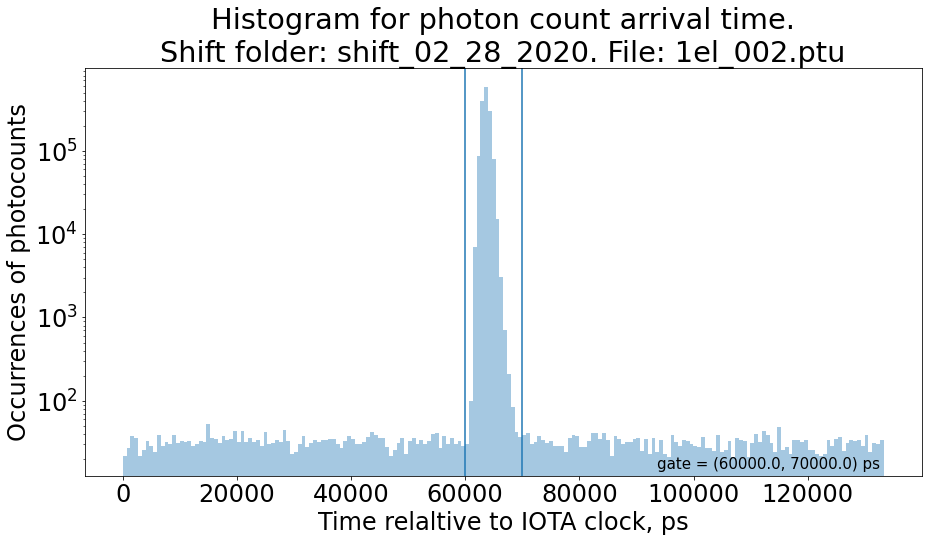

In [3]:
gate = (60000,70000)
plot_arrival_time_hist(t_delays, gate, bins=200, shift_folder_name=shift_02_28_2020.shift_folder_name,
    time_stamp_file_name=file_name)

In [4]:
events = get_events_array(df, n_revolutions, gate)
events

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [14]:
np.sum(events)/len(events)

0.0032971284026122936

In [6]:
# fanos, report = get_fanos(events, n_revolutions, n_of_chunks=1000)

In [7]:
report = {'p_measured': 0.0032971284026122936,
 'chunk_length': 450124,
 'n_events': 1484118,
 'fano_interval': (-0.0033879553189789524, -0.0032102265153594045),
 'fano_interval_percentiles': (0.16, 0.84),
 'fano_median': -0.003296869307124195,
 'fano_mean': -0.003297129235499584,
 'absolute_fano_error': 8.886440180977395e-05}

In [8]:
fanos = np.array([-0.00358346, -0.00355458, -0.00354791, -0.00354569, -0.00352125,
       -0.00351237, -0.00351014, -0.00350792, -0.0035057 , -0.00350126,
       -0.00349681, -0.00349459, -0.00349459, -0.00349237, -0.00349015,
       -0.00349015, -0.00349015, -0.00349015, -0.00348793, -0.00348571,
       -0.00348571, -0.00348571, -0.00348348, -0.00348126, -0.00347682,
       -0.00347682, -0.00347682, -0.00347682, -0.00347682, -0.00347682,
       -0.0034746 , -0.0034746 , -0.00347238, -0.00346793, -0.00346571,
       -0.00346571, -0.00346571, -0.00346127, -0.00346127, -0.00346127,
       -0.00345683, -0.0034546 , -0.0034546 , -0.00345238, -0.00345238,
       -0.00345238, -0.00345238, -0.00345238, -0.00345016, -0.00344794,
       -0.00344794, -0.00344572, -0.00344572, -0.00344572, -0.00344572,
       -0.0034435 , -0.0034435 , -0.00344127, -0.00344127, -0.00343905,
       -0.00343905, -0.00343905, -0.00343683, -0.00343683, -0.00343683,
       -0.00343683, -0.00343239, -0.00343239, -0.00343239, -0.00343239,
       -0.00343017, -0.00342794, -0.00342794, -0.00342794, -0.00342794,
       -0.00342794, -0.00342572, -0.00342572, -0.00342572, -0.00342572,
       -0.0034235 , -0.0034235 , -0.00342128, -0.00342128, -0.00342128,
       -0.00342128, -0.00342128, -0.00342128, -0.00342128, -0.00342128,
       -0.00341906, -0.00341906, -0.00341906, -0.00341906, -0.00341906,
       -0.00341906, -0.00341906, -0.00341684, -0.00341684, -0.00341684,
       -0.00341684, -0.00341684, -0.00341684, -0.00341461, -0.00341461,
       -0.00341461, -0.00341461, -0.00341461, -0.00341461, -0.00341239,
       -0.00341239, -0.00341239, -0.00341239, -0.00341017, -0.00341017,
       -0.00341017, -0.00341017, -0.00341017, -0.00341017, -0.00341017,
       -0.00341017, -0.00341017, -0.00340795, -0.00340573, -0.00340573,
       -0.00340573, -0.00340573, -0.00340573, -0.00340351, -0.00340351,
       -0.00340128, -0.00339906, -0.00339906, -0.00339906, -0.00339906,
       -0.00339906, -0.00339906, -0.00339906, -0.00339906, -0.00339684,
       -0.00339684, -0.00339684, -0.00339684, -0.00339684, -0.00339684,
       -0.00339684, -0.00339684, -0.00339462, -0.00339462, -0.00339462,
       -0.0033924 , -0.0033924 , -0.0033924 , -0.00339018, -0.00339018,
       -0.00339018, -0.00339018, -0.00339018, -0.00339018, -0.00339018,
       -0.00338796, -0.00338796, -0.00338796, -0.00338796, -0.00338573,
       -0.00338351, -0.00338351, -0.00338351, -0.00338351, -0.00338351,
       -0.00338129, -0.00338129, -0.00338129, -0.00338129, -0.00338129,
       -0.00337907, -0.00337907, -0.00337907, -0.00337907, -0.00337907,
       -0.00337907, -0.00337907, -0.00337907, -0.00337907, -0.00337685,
       -0.00337685, -0.00337685, -0.00337685, -0.00337685, -0.00337463,
       -0.00337463, -0.00337463, -0.0033724 , -0.0033724 , -0.0033724 ,
       -0.0033724 , -0.0033724 , -0.0033724 , -0.0033724 , -0.00337018,
       -0.00337018, -0.00337018, -0.00337018, -0.00337018, -0.00337018,
       -0.00337018, -0.00337018, -0.00336796, -0.00336796, -0.00336796,
       -0.00336796, -0.00336796, -0.00336574, -0.00336574, -0.00336574,
       -0.00336574, -0.00336574, -0.00336574, -0.00336574, -0.00336352,
       -0.00336352, -0.00336352, -0.00336352, -0.00336352, -0.00336352,
       -0.0033613 , -0.0033613 , -0.0033613 , -0.0033613 , -0.0033613 ,
       -0.00335907, -0.00335907, -0.00335907, -0.00335907, -0.00335907,
       -0.00335907, -0.00335907, -0.00335907, -0.00335907, -0.00335685,
       -0.00335685, -0.00335685, -0.00335685, -0.00335685, -0.00335685,
       -0.00335685, -0.00335685, -0.00335685, -0.00335685, -0.00335463,
       -0.00335463, -0.00335463, -0.00335463, -0.00335463, -0.00335463,
       -0.00335463, -0.00335463, -0.00335463, -0.00335241, -0.00335241,
       -0.00335241, -0.00335241, -0.00335241, -0.00335241, -0.00335241,
       -0.00335241, -0.00335241, -0.00335019, -0.00335019, -0.00335019,
       -0.00335019, -0.00335019, -0.00335019, -0.00335019, -0.00335019,
       -0.00334797, -0.00334797, -0.00334797, -0.00334797, -0.00334797,
       -0.00334797, -0.00334797, -0.00334574, -0.00334574, -0.00334574,
       -0.00334574, -0.00334574, -0.00334574, -0.00334574, -0.00334574,
       -0.00334574, -0.00334574, -0.00334574, -0.00334574, -0.00334574,
       -0.00334352, -0.00334352, -0.00334352, -0.00334352, -0.00334352,
       -0.0033413 , -0.0033413 , -0.0033413 , -0.0033413 , -0.0033413 ,
       -0.0033413 , -0.0033413 , -0.0033413 , -0.0033413 , -0.0033413 ,
       -0.00333908, -0.00333908, -0.00333908, -0.00333908, -0.00333908,
       -0.00333908, -0.00333908, -0.00333686, -0.00333686, -0.00333686,
       -0.00333686, -0.00333686, -0.00333686, -0.00333464, -0.00333464,
       -0.00333464, -0.00333464, -0.00333464, -0.00333464, -0.00333464,
       -0.00333464, -0.00333464, -0.00333464, -0.00333464, -0.00333464,
       -0.00333464, -0.00333242, -0.00333242, -0.00333242, -0.00333242,
       -0.00333242, -0.00333242, -0.00333242, -0.00333242, -0.00333242,
       -0.00333242, -0.00333242, -0.00333019, -0.00333019, -0.00333019,
       -0.00333019, -0.00333019, -0.00333019, -0.00333019, -0.00333019,
       -0.00333019, -0.00332797, -0.00332797, -0.00332797, -0.00332797,
       -0.00332575, -0.00332575, -0.00332575, -0.00332575, -0.00332575,
       -0.00332575, -0.00332575, -0.00332575, -0.00332575, -0.00332575,
       -0.00332575, -0.00332575, -0.00332575, -0.00332575, -0.00332575,
       -0.00332353, -0.00332353, -0.00332353, -0.00332353, -0.00332353,
       -0.00332353, -0.00332353, -0.00332353, -0.00332131, -0.00332131,
       -0.00332131, -0.00332131, -0.00332131, -0.00332131, -0.00332131,
       -0.00332131, -0.00332131, -0.00332131, -0.00332131, -0.00332131,
       -0.00332131, -0.00331909, -0.00331909, -0.00331909, -0.00331909,
       -0.00331909, -0.00331909, -0.00331909, -0.00331909, -0.00331909,
       -0.00331909, -0.00331909, -0.00331686, -0.00331686, -0.00331686,
       -0.00331686, -0.00331686, -0.00331686, -0.00331686, -0.00331686,
       -0.00331686, -0.00331686, -0.00331464, -0.00331464, -0.00331464,
       -0.00331464, -0.00331464, -0.00331464, -0.00331464, -0.00331464,
       -0.00331464, -0.00331464, -0.00331242, -0.00331242, -0.00331242,
       -0.00331242, -0.00331242, -0.00331242, -0.0033102 , -0.0033102 ,
       -0.00330798, -0.00330798, -0.00330798, -0.00330798, -0.00330798,
       -0.00330798, -0.00330798, -0.00330798, -0.00330798, -0.00330798,
       -0.00330576, -0.00330576, -0.00330576, -0.00330576, -0.00330576,
       -0.00330576, -0.00330576, -0.00330576, -0.00330576, -0.00330576,
       -0.00330576, -0.00330576, -0.00330353, -0.00330353, -0.00330353,
       -0.00330353, -0.00330353, -0.00330353, -0.00330353, -0.00330353,
       -0.00330353, -0.00330353, -0.00330131, -0.00330131, -0.00330131,
       -0.00330131, -0.00330131, -0.00330131, -0.00330131, -0.00330131,
       -0.00330131, -0.00330131, -0.00330131, -0.00330131, -0.00330131,
       -0.00330131, -0.00330131, -0.00330131, -0.00329909, -0.00329909,
       -0.00329909, -0.00329909, -0.00329909, -0.00329909, -0.00329909,
       -0.00329909, -0.00329909, -0.00329909, -0.00329687, -0.00329687,
       -0.00329687, -0.00329687, -0.00329687, -0.00329687, -0.00329687,
       -0.00329687, -0.00329687, -0.00329687, -0.00329687, -0.00329465,
       -0.00329465, -0.00329465, -0.00329465, -0.00329465, -0.00329465,
       -0.00329465, -0.00329465, -0.00329243, -0.00329243, -0.00329243,
       -0.00329243, -0.00329243, -0.00329243, -0.00329243, -0.00329243,
       -0.00329243, -0.00329243, -0.00329243, -0.00329243, -0.00329243,
       -0.00329243, -0.00329243, -0.00329243, -0.0032902 , -0.0032902 ,
       -0.0032902 , -0.0032902 , -0.0032902 , -0.0032902 , -0.0032902 ,
       -0.0032902 , -0.00328798, -0.00328798, -0.00328798, -0.00328576,
       -0.00328576, -0.00328576, -0.00328576, -0.00328576, -0.00328576,
       -0.00328576, -0.00328576, -0.00328576, -0.00328576, -0.00328354,
       -0.00328354, -0.00328354, -0.00328354, -0.00328354, -0.00328354,
       -0.00328354, -0.00328354, -0.00328354, -0.00328132, -0.00328132,
       -0.00328132, -0.00328132, -0.00328132, -0.00328132, -0.00328132,
       -0.00328132, -0.00328132, -0.00328132, -0.00328132, -0.00328132,
       -0.00328132, -0.00328132, -0.00328132, -0.00328132, -0.0032791 ,
       -0.0032791 , -0.0032791 , -0.0032791 , -0.0032791 , -0.0032791 ,
       -0.0032791 , -0.00327687, -0.00327687, -0.00327687, -0.00327687,
       -0.00327687, -0.00327687, -0.00327687, -0.00327687, -0.00327687,
       -0.00327687, -0.00327687, -0.00327687, -0.00327465, -0.00327465,
       -0.00327465, -0.00327465, -0.00327465, -0.00327465, -0.00327465,
       -0.00327465, -0.00327465, -0.00327465, -0.00327465, -0.00327465,
       -0.00327465, -0.00327465, -0.00327465, -0.00327465, -0.00327243,
       -0.00327243, -0.00327243, -0.00327243, -0.00327243, -0.00327021,
       -0.00327021, -0.00327021, -0.00327021, -0.00327021, -0.00327021,
       -0.00326799, -0.00326799, -0.00326799, -0.00326799, -0.00326799,
       -0.00326799, -0.00326577, -0.00326577, -0.00326577, -0.00326577,
       -0.00326577, -0.00326577, -0.00326577, -0.00326577, -0.00326577,
       -0.00326355, -0.00326355, -0.00326355, -0.00326355, -0.00326355,
       -0.00326355, -0.00326355, -0.00326355, -0.00326355, -0.00326355,
       -0.00326132, -0.00326132, -0.00326132, -0.00326132, -0.00326132,
       -0.00326132, -0.00326132, -0.00326132, -0.00326132, -0.00326132,
       -0.00326132, -0.0032591 , -0.0032591 , -0.0032591 , -0.0032591 ,
       -0.0032591 , -0.00325688, -0.00325688, -0.00325688, -0.00325688,
       -0.00325688, -0.00325688, -0.00325466, -0.00325466, -0.00325466,
       -0.00325466, -0.00325466, -0.00325466, -0.00325466, -0.00325466,
       -0.00325466, -0.00325244, -0.00325244, -0.00325244, -0.00325244,
       -0.00325244, -0.00325244, -0.00325244, -0.00325244, -0.00325244,
       -0.00325244, -0.00325022, -0.00325022, -0.00325022, -0.00325022,
       -0.00325022, -0.00325022, -0.00325022, -0.00325022, -0.00325022,
       -0.00324799, -0.00324799, -0.00324799, -0.00324799, -0.00324799,
       -0.00324799, -0.00324799, -0.00324799, -0.00324577, -0.00324577,
       -0.00324577, -0.00324577, -0.00324577, -0.00324577, -0.00324577,
       -0.00324577, -0.00324577, -0.00324577, -0.00324577, -0.00324577,
       -0.00324355, -0.00324355, -0.00324355, -0.00324355, -0.00324355,
       -0.00324355, -0.00324355, -0.00324355, -0.00324355, -0.00324355,
       -0.00324133, -0.00324133, -0.00324133, -0.00324133, -0.00324133,
       -0.00324133, -0.00324133, -0.00323911, -0.00323911, -0.00323911,
       -0.00323911, -0.00323911, -0.00323911, -0.00323911, -0.00323911,
       -0.00323911, -0.00323911, -0.00323911, -0.00323911, -0.00323911,
       -0.00323911, -0.00323911, -0.00323689, -0.00323689, -0.00323689,
       -0.00323689, -0.00323689, -0.00323689, -0.00323689, -0.00323689,
       -0.00323689, -0.00323689, -0.00323466, -0.00323466, -0.00323466,
       -0.00323466, -0.00323466, -0.00323466, -0.00323466, -0.00323466,
       -0.00323466, -0.00323466, -0.00323466, -0.00323244, -0.00323244,
       -0.00323244, -0.00323244, -0.00323244, -0.00323244, -0.00323244,
       -0.00323022, -0.00323022, -0.00323022, -0.00323022, -0.00323022,
       -0.00323022, -0.00323022, -0.00323022, -0.003228  , -0.003228  ,
       -0.003228  , -0.003228  , -0.003228  , -0.003228  , -0.003228  ,
       -0.003228  , -0.003228  , -0.003228  , -0.00322578, -0.00322578,
       -0.00322578, -0.00322578, -0.00322578, -0.00322578, -0.00322356,
       -0.00322356, -0.00322356, -0.00322133, -0.00322133, -0.00322133,
       -0.00322133, -0.00322133, -0.00322133, -0.00322133, -0.00322133,
       -0.00321911, -0.00321911, -0.00321911, -0.00321689, -0.00321689,
       -0.00321689, -0.00321689, -0.00321689, -0.00321689, -0.00321689,
       -0.00321467, -0.00321467, -0.00321467, -0.00321467, -0.00321467,
       -0.00321467, -0.00321467, -0.00321467, -0.00321467, -0.00321245,
       -0.00321245, -0.00321245, -0.00321245, -0.00321245, -0.00321245,
       -0.00321023, -0.00321023, -0.00321023, -0.00321023, -0.00321023,
       -0.00321023, -0.003208  , -0.003208  , -0.003208  , -0.00320578,
       -0.00320578, -0.00320578, -0.00320578, -0.00320578, -0.00320578,
       -0.00320356, -0.00320356, -0.00320356, -0.00320356, -0.00320134,
       -0.00319912, -0.00319912, -0.00319912, -0.00319912, -0.00319912,
       -0.00319912, -0.0031969 , -0.0031969 , -0.0031969 , -0.0031969 ,
       -0.00319468, -0.00319468, -0.00319468, -0.00319468, -0.00319468,
       -0.00319468, -0.00319468, -0.00319468, -0.00319245, -0.00319245,
       -0.00319245, -0.00319245, -0.00319245, -0.00319023, -0.00319023,
       -0.00319023, -0.00319023, -0.00319023, -0.00319023, -0.00318801,
       -0.00318801, -0.00318801, -0.00318801, -0.00318579, -0.00318579,
       -0.00318579, -0.00318357, -0.00318357, -0.00318357, -0.00318357,
       -0.00318357, -0.00318135, -0.00318135, -0.00318135, -0.00318135,
       -0.00318135, -0.00317912, -0.00317912, -0.00317912, -0.00317912,
       -0.00317912, -0.00317912, -0.00317912, -0.00317912, -0.0031769 ,
       -0.0031769 , -0.0031769 , -0.0031769 , -0.00317468, -0.00317468,
       -0.00317468, -0.00317468, -0.00317468, -0.00317468, -0.00317468,
       -0.00317246, -0.00317246, -0.00317246, -0.00317246, -0.00317246,
       -0.00317246, -0.00317246, -0.00317024, -0.00316802, -0.00316802,
       -0.00316802, -0.00316802, -0.00316802, -0.00316579, -0.00316579,
       -0.00316579, -0.00316579, -0.00316357, -0.00316357, -0.00316357,
       -0.00316357, -0.00316135, -0.00316135, -0.00316135, -0.00315913,
       -0.00315913, -0.00315691, -0.00315691, -0.00315691, -0.00315691,
       -0.00315469, -0.00315469, -0.00315246, -0.00315024, -0.00314802,
       -0.00314802, -0.00314802, -0.00314802, -0.00314802, -0.0031458 ,
       -0.0031458 , -0.0031458 , -0.00314358, -0.00314136, -0.00314136,
       -0.00314136, -0.00314136, -0.00314136, -0.00314136, -0.00314136,
       -0.00314136, -0.00313691, -0.00313469, -0.00313247, -0.00313247,
       -0.00313247, -0.00313025, -0.00313025, -0.00312803, -0.00312136,
       -0.00311248, -0.00311248, -0.00311025, -0.00310803, -0.00310359,
       -0.00309915, -0.0030947 , -0.0030947 , -0.00309026, -0.00308359,
       -0.00308359, -0.00307693, -0.00307693, -0.00307249, -0.00305694,
       -0.00305027, -0.00303028, -0.0030014 , -0.00299473, -0.00293919])

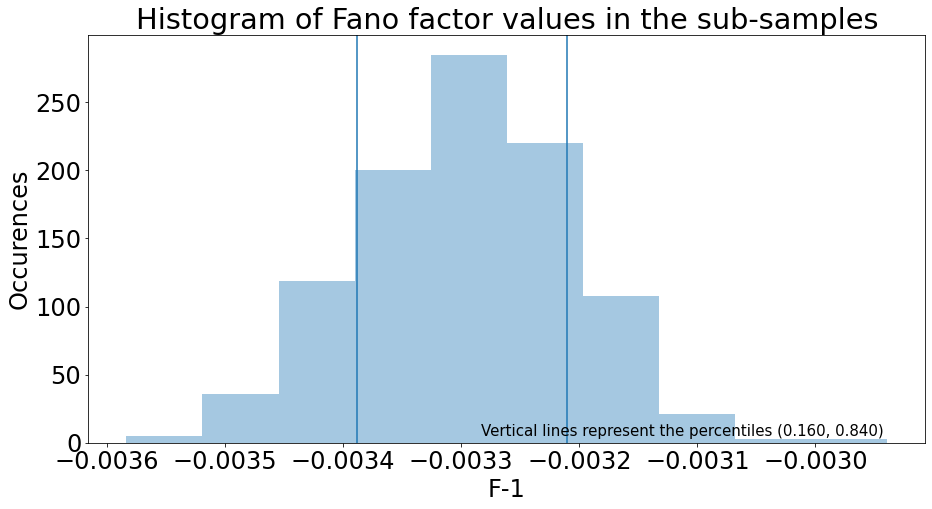

In [13]:
ax = plot_fanos_hist(fanos, report, bins=10, shift_folder_name=shift_02_28_2020.shift_folder_name,
    time_stamp_file_name=file_name)
ax.set_title('Histogram of Fano factor values in the sub-samples')
plt.show()

In [10]:
sum(fanos == np.nan)

0